<a href="https://colab.research.google.com/github/apulsarT/Underground-water/blob/main/undergroundwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [ ]:
pd.set_option('display.max_rows', 3000)

#Import data

In [ ]:
df_underground = pd.read_csv('sample_data/underground.csv')
df_weather = pd.read_csv('sample_data/weather.csv')

In [ ]:
df_weather = pd.read_csv('sample_data/weather.csv')

In [ ]:
df_underground.head()

,DateTime,WaterLevel,EUI
0,2022-09-21 06:42:39.557000+00:00,102.0,24E124126C326140
1,2022-09-21 06:57:39.365000+00:00,102.0,24E124126C326140
2,2022-09-21 07:12:39.732000+00:00,102.0,24E124126C326140
3,2022-09-21 07:27:40.669000+00:00,102.0,24E124126C326140
4,2022-09-21 07:42:42.628000+00:00,102.0,24E124126C326140


# Pre-processing

In [ ]:
def weatherprep(df):
  df['DateTime'] = pd.to_datetime(df['DateTime'])
  # Weather data is recorded in different time zones, all data needs to be added for 8 hours to change to the correct time zone
  df['DateTime'] = df['DateTime'] + timedelta(hours=8)
  df["month"] = df['DateTime'].dt.month
  df["day"] = df['DateTime'].dt.day
  df["hours"] = df['DateTime'].dt.hour
  df['minutes'] = df['DateTime'].dt.minute
  df["date"] = df['DateTime'].dt.date  
  #df = df.groupby(['month','day','hours','minutes']).first().reset_index()
  df = df.groupby(['month','day','hours']).first().reset_index()
  df = df[['DateTime','WeatherRain']] 
  df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H:00:00')
  df['DateTime'] = pd.to_datetime(df['DateTime'])
  df.drop_duplicates(keep='first', inplace=True) 
  df = df.sort_values(by='DateTime')
  df.reset_index(inplace=True)
  df=df.drop(['index'], axis=1)
  return df

df_weather = weatherprep(df_weather)

In [ ]:
df_weather['seconds'] = df_weather['DateTime'].dt.second

In [ ]:
# df_weather['DateTime'] = pd.to_datetime(df_weather['DateTime'])
# df_weather['DateTime'] = df_weather['DateTime'] + timedelta(hours=8)
# df_weather["month"] = df_weather['DateTime'].dt.month
# df_weather["day"] = df_weather['DateTime'].dt.day
# df_weather["hours"] = df_weather['DateTime'].dt.hour
# df_weather['minutes'] = df_weather['DateTime'].dt.minute
# df_weather['seconds'] = df_weather['DateTime'].dt.seconds
# df_weather["date"] = df_weather['DateTime'].dt.date  
# df = df_weather.groupby(['month','day','hours','minutes'])

In [ ]:
df_weather.tail()

,DateTime,WeatherRain
23631,2022-10-20 11:59:00,0.0
23632,2022-10-20 12:14:00,0.0
23633,2022-10-20 12:29:00,0.0
23634,2022-10-20 12:44:00,0.0
23635,2022-10-20 12:59:00,0.0


In [ ]:
#function to filter date
def filterdate(df,start,end):
  df = df.set_index('DateTime')
  df = (df[start:end])
  df.reset_index(inplace=True)
  return df

In [ ]:
df_weather_sepoct = filterdate(df_weather,start='2022-09-01 00:00',end='2022-10-30 23:00')

In [ ]:
df_weather_sepoct.head()

,DateTime,WeatherRain
0,2022-09-01 00:04:00,0.0
1,2022-09-01 00:19:00,0.0
2,2022-09-01 00:34:00,0.0
3,2022-09-01 00:49:00,0.0
4,2022-09-01 01:04:00,0.0


In [ ]:
df_underground['DateTime'] = pd.to_datetime(df_underground['DateTime'])
df_underground['DateTime'] = df_underground['DateTime'].dt.strftime('%Y-%m-%d %H:%M:00')
df_underground['DateTime'] = pd.to_datetime(df_underground['DateTime'])
df_underground['DateTime'] = df_underground['DateTime']+timedelta(hours=8)
df_underground = df_underground[["DateTime","WaterLevel","EUI"]]

In [ ]:
def undergroundprep(df):
  df['DateTime'] = pd.to_datetime(df['DateTime'])
  df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H:00:00')
  #df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:00')
  df['DateTime'] = pd.to_datetime(df['DateTime'])
  df['DateTime'] = df['DateTime']+timedelta(hours=8)
  df["month"] = df['DateTime'].dt.month
  df["day"] = df['DateTime'].dt.day
  df["hours"] = df['DateTime'].dt.hour
  df['minutes'] = df['DateTime'].dt.minute
  #df = df.groupby(['month','day','hours','minutes']).first().reset_index()
  df = df.groupby(['month','day','hours']).first().reset_index()
  df= df.sort_values(by='DateTime')
  #df = df[['EUI','DateTime','WaterLevel']]
  return df
#df_underground = undergroundprep(df_underground)

In [ ]:
  df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H:00:00')
  df['DateTime'] = pd.to_datetime(df['DateTime'])
  df = df.sort_values(by='DateTime')

In [ ]:
df = df_underground.pivot_table(index='DateTime',columns='EUI',values='WaterLevel').rename_axis(None, axis=1).reset_index() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   DateTime          20050 non-null  datetime64[ns, UTC]
 1   24E124126C326081  2259 non-null   float64            
 2   24E124126C326140  2215 non-null   float64            
 3   24E124126C326567  1350 non-null   float64            
 4   24E124126C326591  2064 non-null   float64            
 5   24E124126C326637  1527 non-null   float64            
 6   24E124126C326655  1656 non-null   float64            
 7   24E124126C326675  2302 non-null   float64            
 8   24E124126C326708  2235 non-null   float64            
 9   24E124126C326709  2278 non-null   float64            
 10  24E124126C326742  2176 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10)
memory usage: 1.7 MB


In [ ]:
df.describe()

,24E124126C326081,24E124126C326140,24E124126C326567,24E124126C326591,24E124126C326637,24E124126C326655,24E124126C326675,24E124126C326708,24E124126C326709,24E124126C326742
count,2259.000000,2215.000000,1350.000000,2064.000000,1527.000000,1656.000000,2302.000000,2235.000000,2278.000000,2176.000000
mean,92.072598,61.917833,56.802963,51.753876,84.571709,71.333937,70.840139,94.450559,43.892450,56.562500
std,9.013377,13.360728,7.791272,8.063579,4.418617,4.669910,5.124235,4.207961,4.472364,5.849354
min,61.000000,37.000000,37.000000,28.000000,72.000000,53.000000,50.000000,84.000000,23.000000,48.000000
25%,90.000000,57.000000,52.000000,46.000000,82.000000,69.000000,68.000000,91.000000,40.000000,53.000000
50%,97.000000,61.000000,57.500000,51.000000,85.000000,71.000000,72.000000,95.000000,45.000000,56.000000
75%,97.000000,64.000000,62.000000,56.000000,88.000000,75.000000,75.000000,98.000000,47.000000,59.000000
max,102.000000,102.000000,76.000000,71.000000,95.000000,79.000000,79.000000,103.000000,54.000000,73.000000


In [ ]:
first_datetime = min(df1['DateTime'])
start_min = int(first_datetime.minute)
start_min

44

In [ ]:
EUI = ['24E124126C326081']
df1 = df_underground[df_underground['EUI'].isin(EUI)]
df1 = undergroundprep(df1)
df1 = df1[["DateTime","WaterLevel"]]
df1.reset_index(inplace=True)
df1=df1.drop(['index'], axis=1)

EUI2 = ['24E124126C326140']
df2 = df_underground[df_underground['EUI'].isin(EUI2)]
df2 = undergroundprep(df2)
df2 = df2[["DateTime","WaterLevel"]]
df2.reset_index(inplace=True)
df2=df2.drop(['index'], axis=1)

EUI3 = ['24E124126C326567']
df3 = df_underground[df_underground['EUI'].isin(EUI3)]
df3 = undergroundprep(df3)
df3 = df3[["DateTime","WaterLevel"]]
df3.reset_index(inplace=True)
df3=df3.drop(['index'], axis=1)

EUI4 = ['24E124126C326591']
df4 = df_underground[df_underground['EUI'].isin(EUI4)]
df4 = undergroundprep(df4)
df4 = df4[["DateTime","WaterLevel"]]
df4.reset_index(inplace=True)
df4=df4.drop(['index'], axis=1)

EUI5 = ['24E124126C326637']
df5 = df_underground[df_underground['EUI'].isin(EUI5)]
df5 = undergroundprep(df5)
df5 = df5[["DateTime","WaterLevel"]]
df5.reset_index(inplace=True)
df5=df5.drop(['index'], axis=1)

EUI6 = ['24E124126C326655']
df6 = df_underground[df_underground['EUI'].isin(EUI6)]
df6 = undergroundprep(df6)
df6 = df6[["DateTime","WaterLevel"]]
df6.reset_index(inplace=True)
df6=df6.drop(['index'], axis=1)

EUI7 = ['24E124126C326675']
df7 = df_underground[df_underground['EUI'].isin(EUI7)]
df7 = undergroundprep(df7)
df7 = df7[["DateTime","WaterLevel"]]
df7.reset_index(inplace=True)
df7=df7.drop(['index'], axis=1)

EUI8 = ['24E124126C326708']
df8 = df_underground[df_underground['EUI'].isin(EUI8)]
df8 = undergroundprep(df8)
df8 = df8[["DateTime","WaterLevel"]]
df8.reset_index(inplace=True)
df8=df8.drop(['index'], axis=1)

EUI9 = ['24E124126C326709']
df9 = df_underground[df_underground['EUI'].isin(EUI9)]
df9 = undergroundprep(df9)
df9 = df9[["DateTime","WaterLevel"]]
df9.reset_index(inplace=True)
df9=df9.drop(['index'], axis=1)

EUI10 = ['24E124126C326742']
df10 = df_underground[df_underground['EUI'].isin(EUI10)]
df10 = undergroundprep(df10)
df10 = df10[["DateTime","WaterLevel"]]
df10.reset_index(inplace=True)
df10=df10.drop(['index'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df5.head()

,DateTime,WaterLevel
0,2022-10-01 00:14:00,88.0
1,2022-10-01 00:15:00,88.0
2,2022-10-01 00:16:00,88.0
3,2022-10-01 00:17:00,88.0
4,2022-10-01 00:21:00,88.0


In [ ]:
df_weatherfil = filterdate(df_weather_sepoct,start='2022-09-21 08:00',end='2022-10-30 23:00')

# Relationship between weather and underground waterlevel

(0.0, 100.0)

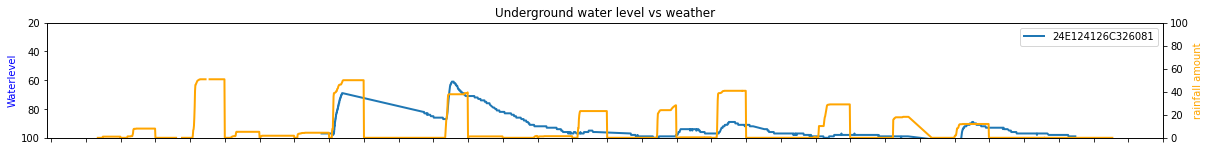

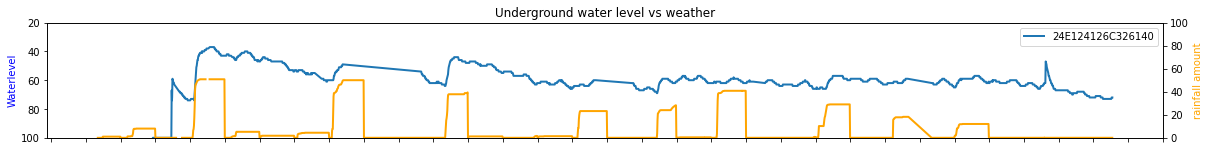

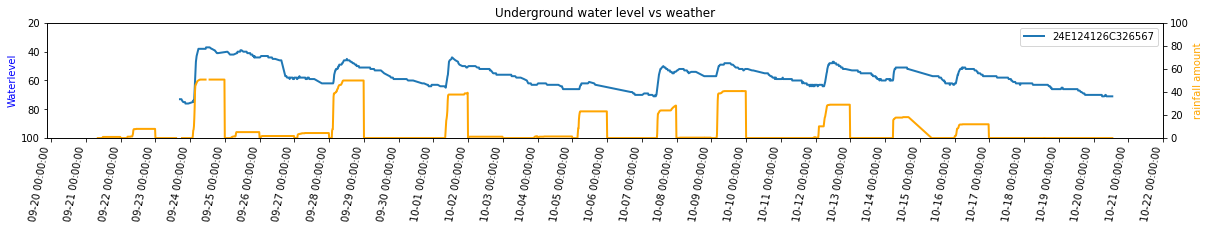

In [ ]:
wl_loc = mdates.DayLocator(interval=1)
wl_fmt = mdates.DateFormatter("%m-%d %H:00:00") 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(311)
ax2 = ax.twinx()
ax.plot(df1['DateTime'],df1['WaterLevel'],lw=2, label="24E124126C326081")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(312)
ax2 = ax.twinx()
ax.plot(df2['DateTime'],df2['WaterLevel'],lw=2, label="24E124126C326140")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(313)
ax2 = ax.twinx()
ax.plot(df3['DateTime'],df3['WaterLevel'],lw=2, label="24E124126C326567")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

(0.0, 100.0)

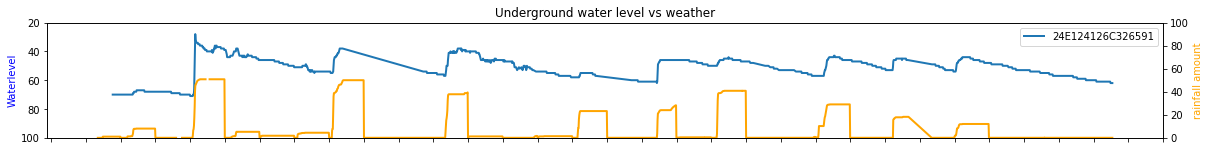

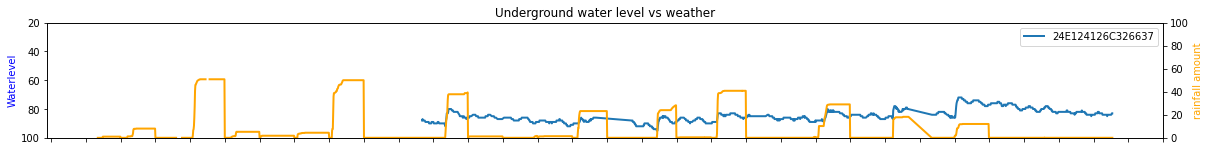

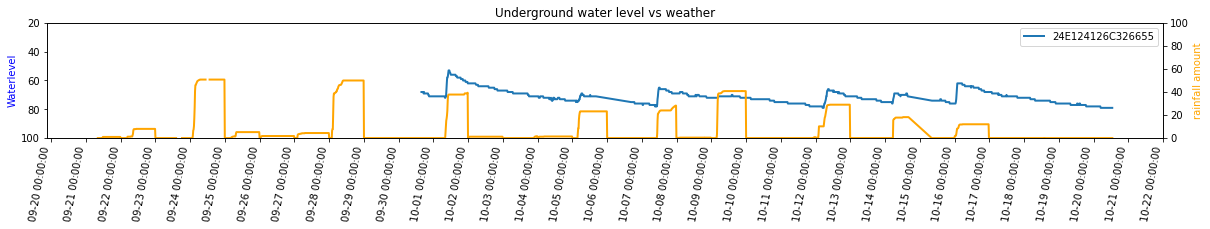

In [ ]:
wl_loc = mdates.DayLocator(interval=1)
wl_fmt = mdates.DateFormatter("%m-%d %H:00:00") 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(311)
ax2 = ax.twinx()
ax.plot(df4['DateTime'],df4['WaterLevel'],lw=2, label="24E124126C326591")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(312)
ax2 = ax.twinx()
ax.plot(df5['DateTime'],df5['WaterLevel'],lw=2, label="24E124126C326637")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(313)
ax2 = ax.twinx()
ax.plot(df6['DateTime'],df6['WaterLevel'],lw=2, label="24E124126C326655")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

(0.0, 100.0)

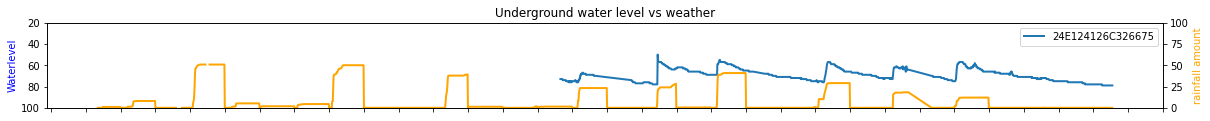

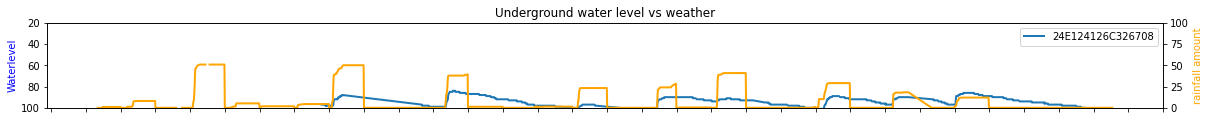

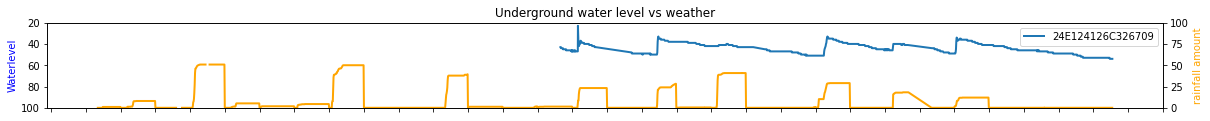

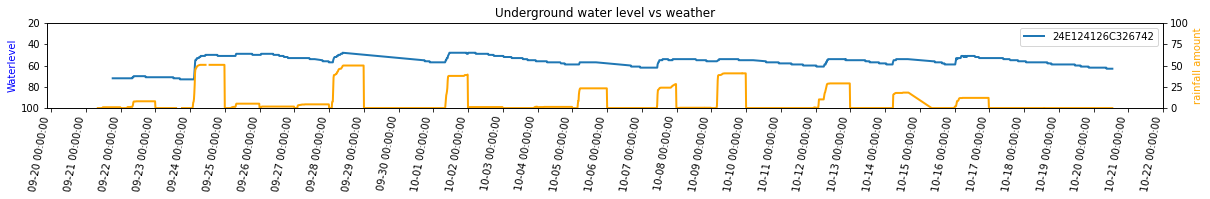

In [ ]:
wl_loc = mdates.DayLocator(interval=1)
wl_fmt = mdates.DateFormatter("%m-%d %H:%M:00")
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(411)
ax2 = ax.twinx()
ax.plot(df7['DateTime'],df7['WaterLevel'],lw=2, label="24E124126C326675")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.invert_yaxis()
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(412) 
ax2 = ax.twinx()
ax.plot(df8['DateTime'],df8['WaterLevel'],lw=2, label="24E124126C326708")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.invert_yaxis()
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(413) 
ax2 = ax.twinx()
ax.plot(df9['DateTime'],df9['WaterLevel'],lw=2, label="24E124126C326709")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.invert_yaxis()
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(414) 
ax2 = ax.twinx()
ax.plot(df10['DateTime'],df10['WaterLevel'],lw=2, label="24E124126C326742")
ax2.plot(df_weatherfil['DateTime'],df_weatherfil['WeatherRain'],lw=2,color="orange", label="raining amount")
ax.xaxis.set_major_locator(wl_loc)
ax.xaxis.set_major_formatter(wl_fmt)  
ax.set_ylabel("Waterlevel",color='b')
ax2.set_ylabel("rainfall amount",color='orange')
ax.legend()
ax.set_title("Underground water level vs weather")
fig.autofmt_xdate(rotation=80)
ax.invert_yaxis()
ax.set_ylim(100,20)
ax2.set_ylim(0,100)

In [ ]:
df_underground["month"] = df_underground['DateTime'].dt.month
df_underground["day"] = df_underground['DateTime'].dt.day
df_underground["hours"] = df_underground['DateTime'].dt.hour
df_underground['minutes'] = df_underground['DateTime'].dt.minute
df_underground["date"] = df_underground['DateTime'].dt.date  
df_underground = df_underground.groupby(['month','day','hours']).first().reset_index()
df_underground = df_underground[["DateTime","WaterLevel","EUI"]]

In [ ]:
df_underground = df_underground[["DateTime","WaterLevel","EUI"]]

In [ ]:
df1 = df1[["DateTime","WaterLevel"]]

In [ ]:
df = df_underground.pivot_table(index='DateTime',columns='EUI',values='WaterLevel').rename_axis(None, axis=1).reset_index() 

In [ ]:
df.head(10)

,DateTime,24E124126C326081,24E124126C326140,24E124126C326567,24E124126C326591,24E124126C326637,24E124126C326655,24E124126C326675,24E124126C326708,24E124126C326709,24E124126C326742
0,2022-09-21 13:57:37,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-21 14:42:39,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-21 15:12:39,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-21 16:27:42,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21 17:12:42,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-09-21 18:12:44,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-09-21 19:12:45,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-09-21 20:12:46,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-09-21 21:12:48,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-09-21 22:12:49,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,24E124126C326081,24E124126C326140,24E124126C326567,24E124126C326591,24E124126C326637,24E124126C326655,24E124126C326675,24E124126C326708,24E124126C326709,24E124126C326742
count,1880.000000,1725.000000,1007.000000,1604.000000,1051.000000,1158.000000,1812.000000,1772.000000,1783.000000,1699.000000
mean,91.185638,61.375652,55.222443,51.318579,86.687916,70.726252,70.754967,94.431716,43.297252,56.473808
std,9.511546,14.878054,7.853035,8.712007,2.885041,4.560571,4.957645,4.034348,4.115372,6.362415
min,61.000000,37.000000,37.000000,28.000000,78.000000,53.000000,50.000000,84.000000,23.000000,48.000000
25%,86.000000,54.000000,51.000000,46.000000,85.000000,69.000000,68.000000,92.000000,40.000000,53.000000
50%,97.000000,60.000000,55.000000,50.000000,87.000000,71.000000,73.000000,95.000000,44.000000,55.000000
75%,97.000000,63.000000,60.000000,56.000000,89.000000,74.000000,75.000000,98.000000,47.000000,58.000000
max,101.000000,102.000000,76.000000,71.000000,95.000000,79.000000,78.000000,103.000000,51.000000,73.000000


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df_weather_sepoct.head()

,DateTime,WeatherRain
0,2022-09-01 00:04:00,0.0
1,2022-09-01 00:19:00,0.0
2,2022-09-01 00:34:00,0.0
3,2022-09-01 00:49:00,0.0
4,2022-09-01 01:04:00,0.0


In [ ]:
df2w = filterdate(df_weather_sepoct,start='2022-09-21 13:56',end='2022-10-20 14:00')

In [ ]:
df3 = filterdate(df3,start='2022-09-23 20:11',end='2022-10-30 00:00')

In [ ]:
df5 = filterdate(df5,start='2022-09-30 16:59',end='2022-10-30 00:00')
df6 = filterdate(df6,start='2022-09-30 16:14',end='2022-10-30 00:00')

In [ ]:
df10.head(50)

,DateTime,WaterLevel
0,2022-09-21 18:28:00,72.0
1,2022-09-21 18:43:00,72.0
2,2022-09-21 18:58:00,72.0
3,2022-09-21 19:13:00,72.0
4,2022-09-21 19:28:00,72.0
5,2022-09-21 19:43:00,72.0
6,2022-09-21 19:58:00,72.0
7,2022-09-21 20:13:00,72.0
8,2022-09-21 20:28:00,72.0
9,2022-09-21 20:43:00,72.0


# Exploration

In [ ]:
df.describe()

,24E124126C326081,24E124126C326140,24E124126C326567,24E124126C326591,24E124126C326637,24E124126C326655,24E124126C326675,24E124126C326708,24E124126C326709,24E124126C326742
count,2259.000000,2215.000000,1350.000000,2064.000000,1527.000000,1656.000000,2302.000000,2235.000000,2278.000000,2176.000000
mean,92.072598,61.917833,56.802963,51.753876,84.571709,71.333937,70.840139,94.450559,43.892450,56.562500
std,9.013377,13.360728,7.791272,8.063579,4.418617,4.669910,5.124235,4.207961,4.472364,5.849354
min,61.000000,37.000000,37.000000,28.000000,72.000000,53.000000,50.000000,84.000000,23.000000,48.000000
25%,90.000000,57.000000,52.000000,46.000000,82.000000,69.000000,68.000000,91.000000,40.000000,53.000000
50%,97.000000,61.000000,57.500000,51.000000,85.000000,71.000000,72.000000,95.000000,45.000000,56.000000
75%,97.000000,64.000000,62.000000,56.000000,88.000000,75.000000,75.000000,98.000000,47.000000,59.000000
max,102.000000,102.000000,76.000000,71.000000,95.000000,79.000000,79.000000,103.000000,54.000000,73.000000


Text(0.5, 1.0, 'WaterLevel-24E124126C326742')

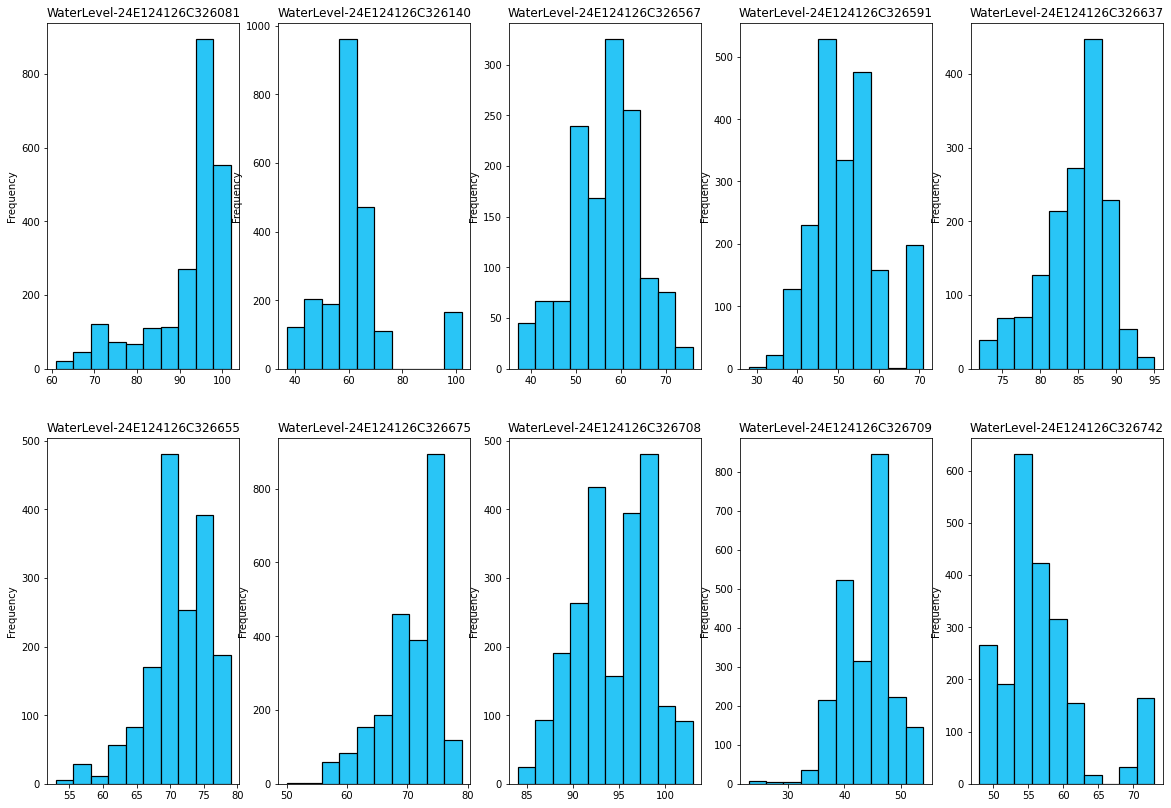

In [ ]:
#Histogram for warehouse (AL)
plt.figure(figsize=(20,14))

#Histogram for loanAmount
plt.subplot(2,5,1)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326081']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlim([0,5000])
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326081')

#Histogram for nPaidOff
plt.subplot(2,5,2)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326140']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlim([0,21])
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326140')

plt.subplot(2,5,3)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326567']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326567')

plt.subplot(2,5,4)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326591']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326591')

plt.subplot(2,5,5)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326637']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326637')

plt.subplot(2,5,6)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326655']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326655')

plt.subplot(2,5,7)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326675']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326675')

plt.subplot(2,5,8)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326708']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326708')

plt.subplot(2,5,9)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326709']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326709')

plt.subplot(2,5,10)
plt.hist(df_underground.loc[df_underground['EUI'] == '24E124126C326742']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326742')

In [ ]:
df_underground['hour']=df_underground['DateTime'].dt.hour
df_underground['date']=df_underground['DateTime'].dt.date

In [ ]:
df_weatherfil['hour']=df_weatherfil['DateTime'].dt.hour
df_weatherfil['hour']=df_weatherfil['DateTime'].dt.date

In [ ]:
#Discretize without label
bins = [0,7,11,19,23]
labels=['12a.m.-6a.m','7a.m.-11a.m.','12p.m.-6p.m.','7p.m.-11p.m.']
df_underground['rank_hour']=pd.cut(df_underground['hour'], bins=bins,include_lowest=True,labels=labels)

In [ ]:
df_test2 = df_underground.loc[(df_underground['WaterLevel'] > 60)]
df_test2.groupby(['EUI', 'rank_hour']).size().unstack()

rank_hour,12a.m.-6a.m,7a.m.-11a.m.,12p.m.-6p.m.,7p.m.-11p.m.
EUI,,,,
24E124126C326081,909,312,563,484
24E124126C326140,451,217,255,273
24E124126C326567,151,53,120,117
24E124126C326591,126,53,57,55
24E124126C326637,512,261,507,257
24E124126C326655,556,276,523,267
24E124126C326675,836,308,651,432
24E124126C326708,857,293,624,466
24E124126C326742,150,51,93,74


In [ ]:
df_test = df_underground.loc[(df_underground['WaterLevel'] > 60)]
df_test.groupby(['EUI','date', 'rank_hour']).size().unstack()

rank_hour                    12a.m.-6a.m  7a.m.-11a.m.  12p.m.-6p.m.  \
EUI              date                                                  
24E124126C326081 2022-09-21            0             0             0   
                 2022-09-22            0             0             0   
                 2022-09-23            0             0             0   
                 2022-09-24            0             0             0   
                 2022-09-27            0             0            74   
                 2022-09-28          423            68             0   
                 2022-09-30            0             0            14   
                 2022-10-01           27            12            31   
                 2022-10-02           27            15            18   
                 2022-10-03           27            14            27   
                 2022-10-04           32            14            27   
                 2022-10-05           25            14            18   
                 2022-10-06            0             0            13   
                 2022-10-07           29            15            30   
                 2022-10-08           27            15            29   
                 2022-10-09           24            16            30   
                 2022-10-10           18             0            27   
                 2022-10-11           30            13            32   
                 2022-10-12           32            16            32   
                 2022-10-13           29            16            28   
                 2022-10-14           31            14            14   
                 2022-10-15            0            12            30   
                 2022-10-16           32            15            32   
                 2022-10-17           32            15            27   
                 2022-10-18           32            16            30   
                 2022-10-19           32            12             0   
                 2022-10-20            0             0             0   
24E124126C326140 2022-09-21            0             0            24   
                 2022-09-22           29            16            30   
                 2022-09-23           28            11            18   
                 2022-09-24           11             0             0   
                 2022-09-27            0             0             0   
                 2022-09-28            0             0             0   
                 2022-09-30            0             0             0   
                 2022-10-01           29             4             0   
                 2022-10-02            0             0             0   
                 2022-10-03            0             0             0   
                 2022-10-04           27            15            21   
                 2022-10-05           31            17            10   
                 2022-10-06            0             0            15   
                 2022-10-07           31            14             7   
                 2022-10-08            2             0             0   
                 2022-10-09           27            16             0   
                 2022-10-10           17             0            13   
                 2022-10-11           30            12            30   
                 2022-10-12           31             5             0   
                 2022-10-13            0            14             2   
                 2022-10-14           32            16             3   
                 2022-10-15            0            15            14   
                 2022-10-16           11             0             0   
                 2022-10-17           23            14            13   
                 2022-10-18           31            16            18   
                 2022-10-19           32            16            32   
                 2022-10-20           29

In [ ]:
df_test2 = df_underground.loc[(df_underground['WaterLevel'] < 45)]
df_test2.groupby(['EUI', 'rank_hour']).size().unstack()

rank_hour,12a.m.-6a.m,7a.m.-11a.m.,12p.m.-6p.m.,7p.m.-11p.m.
EUI,,,,
24E124126C326140,39,30,66,17
24E124126C326567,47,26,29,10
24E124126C326591,104,64,100,38
24E124126C326709,437,263,326,76


In [ ]:
df_test = df_underground.loc[(df_underground['WaterLevel'] < 45)]
df_test.groupby(['EUI','date', 'rank_hour']).size().unstack()

rank_hour                    12a.m.-6a.m  7a.m.-11a.m.  12p.m.-6p.m.  \
EUI              date                                                  
24E124126C326140 2022-09-24           10            16            25   
                 2022-09-25           23            14            31   
                 2022-09-26            6             0             0   
                 2022-09-28            0             0             0   
                 2022-10-01            0             0            10   
                 2022-10-02            0             0             0   
                 2022-10-04            0             0             0   
                 2022-10-05            0             0             0   
                 2022-10-07            0             0             0   
                 2022-10-08            0             0             0   
                 2022-10-09            0             0             0   
                 2022-10-10            0             0             0   
                 2022-10-12            0             0             0   
                 2022-10-13            0             0             0   
                 2022-10-14            0             0             0   
                 2022-10-15            0             0             0   
                 2022-10-16            0             0             0   
                 2022-10-17            0             0             0   
24E124126C326567 2022-09-24           15            10            10   
                 2022-09-25            5            14            17   
                 2022-09-26           27             2             0   
                 2022-09-28            0             0             0   
                 2022-10-01            0             0             2   
                 2022-10-02            0             0             0   
                 2022-10-04            0             0             0   
                 2022-10-05            0             0             0   
                 2022-10-07            0             0             0   
                 2022-10-08            0             0             0   
                 2022-10-09            0             0             0   
                 2022-10-10            0             0             0   
                 2022-10-12            0             0             0   
                 2022-10-13            0             0             0   
                 2022-10-14            0             0             0   
                 2022-10-15            0             0             0   
                 2022-10-16            0             0             0   
                 2022-10-17            0             0             0   
24E124126C326591 2022-09-24           20            13            23   
                 2022-09-25           27            16            30   
                 2022-09-26            0             0             0   
                 2022-09-28           17             6             0   
                 2022-10-01            0             6            29   
                 2022-10-02           31             2             0   
                 2022-10-04            0             0             0   
                 2022-10-05            0             0             0   
                 2022-10-07            0             0             0   
                 2022-10-08            0             0             0   
                 2022-10-09            0             1             0   
                 2022-10-10            0             0             0   
                 2022-10-12            0            10            18   
                 2022-10-13            0             0             0   
                 2022-10-14            0             0             0   
                 2022-10-15            0             0             0   
                 2022-10-16            9            10             0   
                 2022-10-17            0

In [ ]:
#5 to 11
dfmorning = df_underground.loc[(df_underground["hour"] >=5)&(df_underground["hour"] <=11)]
#12 to 17
dfafternoon = df_underground.loc[(df_underground["hour"] >=12)&(df_underground["hour"] <=17)]
#18 to 23
dfevening = df_underground.loc[(df_underground["hour"] >=18)&(df_underground["hour"] <=23)]
#1 to 4
dfmidnight = df_underground.loc[(df_underground["hour"] >=0)&(df_underground["hour"] <=4)]

Text(0.5, 1.0, 'WaterLevel-24E124126C326742')

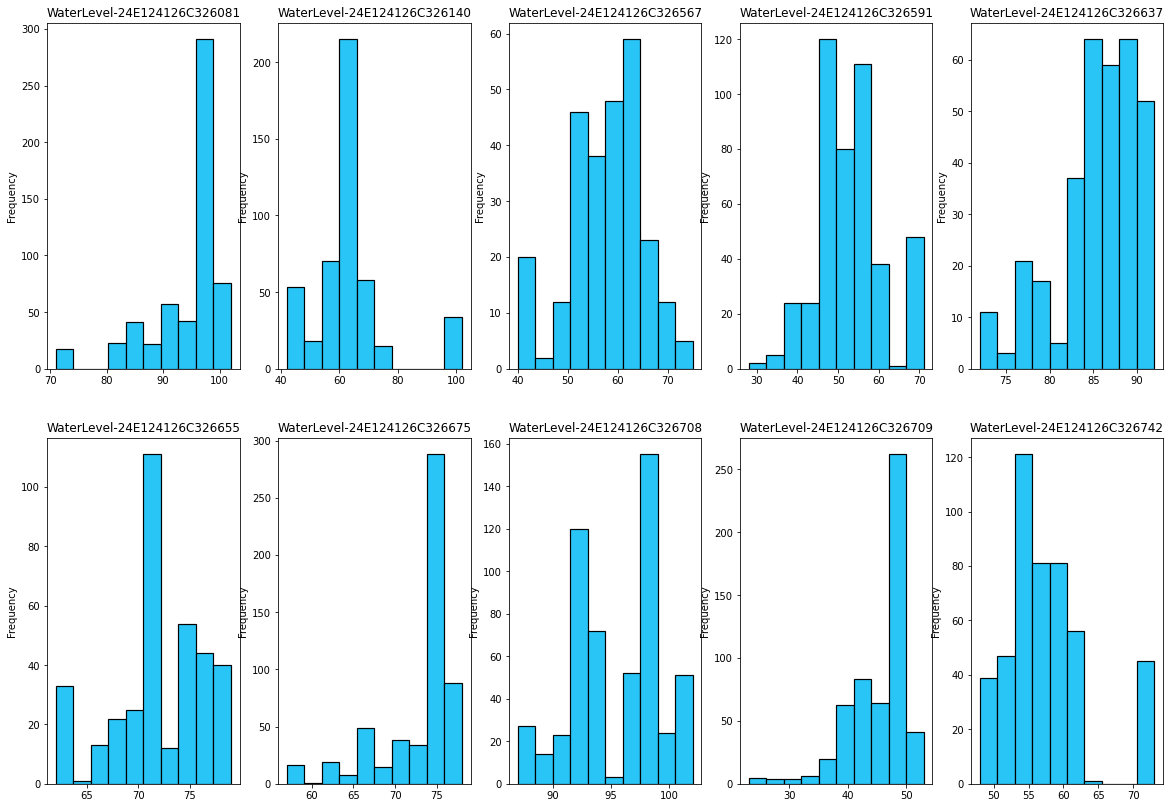

In [ ]:
#Histogram for warehouse (AL)
plt.figure(figsize=(20,14))

#Histogram for loanAmount
plt.subplot(2,5,1)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326081']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlim([0,5000])
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326081')

#Histogram for nPaidOff
plt.subplot(2,5,2)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326140']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlim([0,21])
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326140')

plt.subplot(2,5,3)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326567']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326567')

plt.subplot(2,5,4)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326591']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326591')

plt.subplot(2,5,5)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326637']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326637')

plt.subplot(2,5,6)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326655']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326655')

plt.subplot(2,5,7)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326675']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326675')

plt.subplot(2,5,8)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326708']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326708')

plt.subplot(2,5,9)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326709']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326709')

plt.subplot(2,5,10)
plt.hist(dfmidnight.loc[dfmidnight['EUI'] == '24E124126C326742']['WaterLevel'],color='#29C5F6',edgecolor='black', linewidth=1.2)
#plt.xlabel('WaterLevel')
plt.ylabel('Frequency')
plt.title('WaterLevel-24E124126C326742')

In [ ]:
df2.describe()

,WaterLevel,1,differences
count,2215.000000,2064.000000,2064.000000
mean,61.917833,61.834787,0.203973
std,13.360728,13.183824,0.940583
min,37.000000,37.000000,0.000000
25%,57.000000,57.000000,0.000000
50%,61.000000,61.000000,0.000000
75%,64.000000,64.000000,0.000000
max,102.000000,102.000000,33.000000


In [ ]:
df3.describe()

,WaterLevel,1
count,1345.000000,922.000000
mean,56.739033,56.394794
std,7.734499,7.610232
min,37.000000,37.000000
25%,52.000000,51.000000
50%,57.000000,57.000000
75%,62.000000,62.000000
max,76.000000,76.000000


In [ ]:
df2[(df2['WaterLevel'] >= 80)]

,DateTime,WaterLevel,1,differences
0,2022-09-21 13:57:00,102.0,NaN,NaN
1,2022-09-21 14:12:00,102.0,102.0,0.0
2,2022-09-21 14:27:00,102.0,102.0,0.0
3,2022-09-21 14:42:00,102.0,102.0,0.0
4,2022-09-21 14:57:00,102.0,102.0,0.0
5,2022-09-21 15:12:00,102.0,102.0,0.0
6,2022-09-21 15:27:00,102.0,102.0,0.0
7,2022-09-21 15:42:00,102.0,102.0,0.0
8,2022-09-21 15:57:00,102.0,102.0,0.0
9,2022-09-21 16:27:00,102.0,NaN,NaN


# Rate of change

In [ ]:
df2.head()

,DateTime,WaterLevel
0,2022-09-21 13:00:00,102.0
1,2022-09-21 14:00:00,102.0
2,2022-09-21 15:00:00,102.0
3,2022-09-21 16:00:00,102.0
4,2022-09-21 17:00:00,102.0


In [ ]:
#Function to add lags
def add_lags(df):
  df = df.set_index('DateTime')
  for i in range(timestamp):
    df[i+1] = df['WaterLevel'].shift(i+1, freq='15min')
  df.reset_index(inplace=True)
  return df

In [ ]:
#Function to add lags
def add_lags(df):
  df = df.set_index('DateTime')
  for i in range(timestamp):
    df[i+1] = df['WaterLevel'].shift(i+1, freq='H')
  df.reset_index(inplace=True)
  return df

def add_lags2(df):
  df = df.set_index('DateTime')
  for i in range(timestamp):
    df[i+1] = df['WeatherRain'].shift(i+1, freq='H')
  df.reset_index(inplace=True)
  return df

In [ ]:
timestamp=1
df3= add_lags(df3)
#df3= df3.dropna().reset_index(drop=True)
df3.head()

df4= add_lags(df4)
#df4= df4.dropna().reset_index(drop=True)
df4.head()

df5= add_lags(df5)
#df5= df5.dropna().reset_index(drop=True)
df5.head()

df6= add_lags(df6)
#df6= df6.dropna().reset_index(drop=True)
df6.head()

df10= add_lags(df10)
#df10= df10.dropna().reset_index(drop=True)
df10.head()

,DateTime,WaterLevel,1
0,2022-09-21 18:00:00,72.0,NaN
1,2022-09-21 19:00:00,72.0,72.0
2,2022-09-21 20:00:00,72.0,72.0
3,2022-09-21 21:00:00,72.0,72.0
4,2022-09-21 22:00:00,72.0,72.0


In [ ]:
timestamp=1
df1= add_lags(df1)
#df3= df3.dropna().reset_index(drop=True)
df3.head()

df2= add_lags(df2)
#df2= df2.dropna().reset_index(drop=True)
df2.head()

df7= add_lags(df7)
#df7= df7.dropna().reset_index(drop=True)
df7.head()

df8= add_lags(df8)
#df8= df8.dropna().reset_index(drop=True)
df8.head()

df9= add_lags(df9)
#df9= df9.dropna().reset_index(drop=True)
df9.head()

,DateTime,WaterLevel,1
0,2022-10-04 15:00:00,43.0,NaN
1,2022-10-04 16:00:00,43.0,43.0
2,2022-10-04 17:00:00,44.0,43.0
3,2022-10-04 18:00:00,45.0,44.0
4,2022-10-04 19:00:00,45.0,45.0


In [ ]:
df1['differences'] = abs(df1['WaterLevel']-df1[1])
df_weatherlag['raindifference'] = abs(df_weatherlag['WeatherRain']-df_weatherlag[1])

In [ ]:
df1['differences'] = df1[1]-df1['WaterLevel']
df_weatherlag['raindifference'] = df_weatherlag[1]-df_weatherlag['WeatherRain']

In [ ]:
df_weatherlag = add_lags2(df_weatherfil)

In [ ]:
df_1 = pd.merge(df_weatherlag,df1,left_on='DateTime',right_on='DateTime',how='right')

In [ ]:
df_1.head(100)

,DateTime,WeatherRain,1_x,raindifference,WaterLevel,1_y,differences
0,2022-09-27 18:00:00,4.4,4.4,0.0,97.0,NaN,NaN
1,2022-09-27 19:00:00,4.4,4.4,0.0,97.0,97.0,0.0
2,2022-09-27 20:00:00,4.4,4.4,0.0,97.0,97.0,0.0
3,2022-09-27 21:00:00,4.4,4.4,0.0,97.0,97.0,0.0
4,2022-09-27 22:00:00,4.4,4.4,0.0,97.0,97.0,0.0
5,2022-09-27 23:00:00,4.4,4.4,0.0,97.0,97.0,0.0
6,2022-09-28 00:00:00,0.0,4.4,4.4,97.0,97.0,0.0
7,2022-09-28 01:00:00,0.0,0.0,0.0,97.0,97.0,0.0
8,2022-09-28 02:00:00,6.4,0.0,6.4,97.0,97.0,0.0
9,2022-09-28 03:00:00,35.8,6.4,29.4,97.0,97.0,0.0


In [ ]:
timestamp = 1
df2= add_lags(df2)
#df2= df2.dropna().reset_index(drop=True)
df2.head()

df3= add_lags(df3)
#df3= df3.dropna().reset_index(drop=True)
df3.head()

df5= add_lags(df5)
#df5= df5.dropna().reset_index(drop=True)
df5.head()

df3= add_lags(df3)
#df3= df3.dropna().reset_index(drop=True)
df3.head()

,DateTime,WaterLevel,1
0,2022-09-21 13:57:00,102.0,NaN
1,2022-09-21 14:12:00,102.0,102.0
2,2022-09-21 14:27:00,102.0,102.0
3,2022-09-21 14:42:00,102.0,102.0
4,2022-09-21 14:57:00,102.0,102.0


In [ ]:
df2['lag_1'] = df2['WaterLevel'].shift(1)

In [ ]:
df2c = pd.merge(df2w, df2, left_index=True, right_index=True)

In [ ]:
df2c.head(1000)

,DateTime_x,WeatherRain,DateTime_y,WaterLevel,1,differences
0,2022-09-21 13:56:00,1.0,2022-09-21 13:57:00,102.0,NaN,NaN
1,2022-09-21 14:11:00,1.0,2022-09-21 14:12:00,102.0,102.0,0.0
2,2022-09-21 14:26:00,1.0,2022-09-21 14:27:00,102.0,102.0,0.0
3,2022-09-21 14:41:00,1.0,2022-09-21 14:42:00,102.0,102.0,0.0
4,2022-09-21 14:56:00,1.0,2022-09-21 14:57:00,102.0,102.0,0.0
5,2022-09-21 15:11:00,1.0,2022-09-21 15:12:00,102.0,102.0,0.0
6,2022-09-21 15:26:00,1.0,2022-09-21 15:27:00,102.0,102.0,0.0
7,2022-09-21 15:41:00,1.0,2022-09-21 15:42:00,102.0,102.0,0.0
8,2022-09-21 15:56:00,1.0,2022-09-21 15:57:00,102.0,102.0,0.0
9,2022-09-21 16:11:00,1.0,2022-09-21 16:27:00,102.0,NaN,NaN


In [ ]:
df2['differences'] = abs(df2['WaterLevel']-df2[1])
df2.describe()

,WaterLevel,1,differences
count,2215.000000,2064.000000,2064.000000
mean,61.917833,61.834787,0.203973
std,13.360728,13.183824,0.940583
min,37.000000,37.000000,0.000000
25%,57.000000,57.000000,0.000000
50%,61.000000,61.000000,0.000000
75%,64.000000,64.000000,0.000000
max,102.000000,102.000000,33.000000


In [ ]:
df2[(df2['differences'] >= 0)]

,DateTime,WaterLevel,1,differences
1,2022-09-21 14:12:00,102.0,102.0,0.0
2,2022-09-21 14:27:00,102.0,102.0,0.0
3,2022-09-21 14:42:00,102.0,102.0,0.0
4,2022-09-21 14:57:00,102.0,102.0,0.0
5,2022-09-21 15:12:00,102.0,102.0,0.0
6,2022-09-21 15:27:00,102.0,102.0,0.0
7,2022-09-21 15:42:00,102.0,102.0,0.0
8,2022-09-21 15:57:00,102.0,102.0,0.0
10,2022-09-21 16:42:00,102.0,102.0,0.0
11,2022-09-21 16:57:00,102.0,102.0,0.0


In [ ]:
df2[]

In [ ]:
df1['differences'] = abs(df1['WaterLevel']-df1[1])

In [ ]:
df3['differences'] = abs(df3['WaterLevel']-df3['lag_1'])
df4['differences'] = abs(df4['WaterLevel']-df4['lag_1'])
df5['differences'] = abs(df5['WaterLevel']-df5['lag_1'])
df6['differences'] = abs(df6['WaterLevel']-df6['lag_1'])
df7['differences'] = abs(df7['WaterLevel']-df7['lag_1'])
df8['differences'] = abs(df8['WaterLevel']-df8['lag_1'])
df9['differences'] = abs(df9['WaterLevel']-df9['lag_1'])
df10['differences'] = abs(df10['WaterLevel']-df10['lag_1'])

In [ ]:
df2[(df2['differences'] >= 1)]

,DateTime,WaterLevel,lag_1,differences
75,2022-09-22 10:13:00,101.0,102.0,1.0
121,2022-09-22 22:13:00,100.0,101.0,1.0
165,2022-09-23 11:13:00,67.0,100.0,33.0
166,2022-09-23 11:23:00,74.0,67.0,7.0
167,2022-09-23 11:30:00,72.0,74.0,2.0
...,...,...,...,...
1685,2022-10-14 05:57:00,61.0,62.0,1.0
1696,2022-10-14 08:42:00,62.0,61.0,1.0
1710,2022-10-14 12:12:00,61.0,62.0,1.0
1713,2022-10-14 12:57:00,60.0,61.0,1.0


In [ ]:
df2['roc'] = ((df2['WaterLevel']/df2['lag_1'])-1)*100

In [ ]:
df2[(df2['differences'] >= 11)]

,DateTime,WaterLevel,lag_1,differences,roc
164,2022-09-23 19:13:00,67.0,100.0,33.0,-33.000000
167,2022-09-23 19:45:00,59.0,72.0,13.0,-18.055556


In [ ]:
df1[(df1['differences'] >= 3)]

,DateTime,WaterLevel,1,differences
335,2022-09-28 11:28:00,94.0,97.0,3.0
336,2022-09-28 11:29:00,94.0,97.0,3.0
337,2022-09-28 11:30:00,94.0,97.0,3.0
338,2022-09-28 11:31:00,94.0,97.0,3.0
339,2022-09-28 11:33:00,94.0,97.0,3.0
340,2022-09-28 11:34:00,94.0,97.0,3.0
341,2022-09-28 11:40:00,93.0,97.0,4.0
342,2022-09-28 11:43:00,92.0,97.0,5.0
343,2022-09-28 11:48:00,91.0,97.0,6.0
344,2022-09-28 11:49:00,91.0,97.0,6.0


In [ ]:
df1[(df1['differences'] > 0)]

,DateTime,WaterLevel,1,differences
328,2022-09-28 11:15:00,96.0,97.0,1.0
329,2022-09-28 11:19:00,96.0,97.0,1.0
330,2022-09-28 11:21:00,96.0,97.0,1.0
331,2022-09-28 11:22:00,96.0,97.0,1.0
332,2022-09-28 11:24:00,96.0,97.0,1.0
333,2022-09-28 11:25:00,95.0,97.0,2.0
334,2022-09-28 11:27:00,95.0,97.0,2.0
335,2022-09-28 11:28:00,94.0,97.0,3.0
336,2022-09-28 11:29:00,94.0,97.0,3.0
337,2022-09-28 11:30:00,94.0,97.0,3.0


In [ ]:
df = df_weatherfil.set_index('DateTime')
df = df

In [ ]:
df_weatherfil.head(1000)

,DateTime,WeatherRain
0,2022-09-21 08:10:00,0.0
1,2022-09-21 08:25:00,0.0
2,2022-09-21 08:40:00,0.0
3,2022-09-21 08:55:00,0.0
4,2022-09-21 09:10:00,0.0
5,2022-09-21 09:25:00,0.0
6,2022-09-21 09:40:00,0.0
7,2022-09-21 09:55:00,0.0
8,2022-09-21 10:10:00,0.0
9,2022-09-21 10:25:00,0.0


In [ ]:
df_weatherfil = filterdate(df_weather_sepoct,start='2022-09-21 08:00',end='2022-10-30 23:00')

In [ ]:
df = df_sensor.pivot_table(index='DateTime',columns='EUI',values='WaterLevel').rename_axis(None, axis=1).reset_index() 